In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import torch.utils.data
import numpy as np

from inceptionscorepytorch import inception_score

In [2]:
# Creating custom dataloader in pytorch. Includes patch to images. 
# Reference: https://gist.github.com/andrewjong/6b02ff237533b3b2c554701fb53d5c4d 
class MetricsImageFolder(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(MetricsImageFolder, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

In [3]:
data_dir = '../CycleGAN/ssim_monet_test/'
images = torch.empty(0, 3, 256, 256)

test_transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(256),
                                transforms.ToTensor()])

dataset = MetricsImageFolder(data_dir, transform=test_transform) # our custom dataset

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

for inputs, labels, paths in dataloader:
    #Only select the generated fake images.
    if(paths[0].find("fake_B") != -1):
        images = torch.cat((images, inputs), 0)

print(images.shape)

torch.Size([50, 3, 256, 256])


In [4]:
# Calculate inception score
# Reference: https://github.com/sbarratt/inception-score-pytorch

inception_score.inception_score(images, batch_size= 1, resize=True)

C:\Users\Jakob\anaconda3\lib\site-packages\torch\nn\functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
C:\Users\Jakob\projects\CycleGAN\inceptionscorepytorch\inception_score.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()


(4.041113455538871, 0.0)

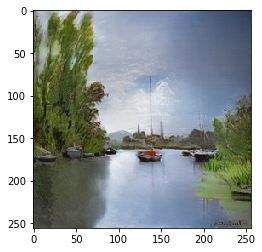

In [5]:
#Look at an image:
from matplotlib import pyplot as plt
plt.imshow(images[2].permute(1, 2, 0), interpolation='nearest')
plt.show()